In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, log_loss, plot_roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
dst1_final = pd.read_csv('dst1_final.csv')
dst1 = pd.read_csv('aug_train.csv')
dst2 = pd.read_csv('aug_test.csv')

In [3]:
X = dst1_final.drop(['target'], axis = 1)
Y = dst1_final['target']

i have to see first is my data balanced or not

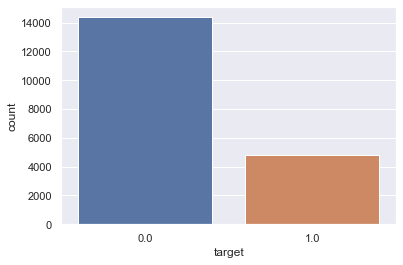

In [4]:
sns.set_theme(style="darkgrid")
sns.countplot(x="target", data=dst1)

from the graph above we can that the data is imbalanced with the target = 0 as not looking for job change as mayor data and target = 1 as minor data.
The nextstep im gonna do is use SMOTE method to make the data balanced so my data will not be bias to mayor data and ignored the minor one

## SMOTE

In [5]:
smote = SMOTE(random_state = 402)
X_smote, Y_smote = smote.fit_resample(X,Y)

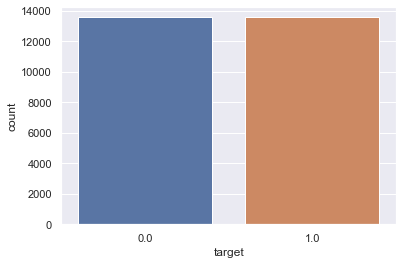

In [6]:
sns.countplot(x=Y_smote, data=dst1)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_smote, Y_smote, test_size = 0.2 ,random_state = 42)

now im gonna make my dataset normalize again so it will not get bias towards only particular feature

In [8]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_val=sc.fit(X_val)

## Hyperparameter Tuning and RandomCV

In [9]:
clf = XGBClassifier()

A parameter grid for XGBoost

In [10]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
random_cv=RandomizedSearchCV(estimator=clf,param_distributions=params,
                             cv=5,n_iter=5,scoring='roc_auc',n_jobs=1,verbose=3,return_train_score=True,random_state=121)
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8, score=(train=0.916, test=0.908), total=   2.4s
[CV] subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8 
[12:38:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8, score=(train=0.916, test=0.904), total=   1.1s
[CV] subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8 
[12:38:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV]  subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8, score=(train=0.917, test=0.898), total=   1.1s
[CV] subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8 
[12:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8, score=(train=0.918, test=0.905), total=   1.2s
[CV] subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8 
[12:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eva

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   38.4s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [13]:
random_cv.best_params_

{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 4,
 'gamma': 1,
 'colsample_bytree': 0.6}

In [14]:
clf = XGBClassifier(colsample_bytree= 0.8,
 gamma= 1.5,
 max_depth= 5,
 min_child_weigh= 1,
 subsample= 0.6)

clf.fit(X_train, y_train)

[12:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weigh=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

now lets see how is our score

In [15]:
clf.score(X_train,y_train)

0.8717123413647232

In [16]:
clf.fit(X,Y)

[12:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weigh=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [17]:
filename = 'xgb.sav'

In [18]:
pickle .dump(clf, open(filename, 'wb'))